import modules and check tensorflow version

In [1]:
# TensorFlow ve tf.keras
import tensorflow as tf
from tensorflow import keras

# Yardimci kutuphaneler
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

2.0.0-beta1


download fashion mnist dataset and split into train and test parts

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Give class names

In [3]:
class_names = ['Tişört/Üst', 'Pantolon', 'Kazak', 'Elbise', 'Mont', 
               'Sandal', 'Gömlek', 'Spor Ayakkabı', 'Çanta', 'Yarım Bot']

# Determine shape of images

In [4]:
# train
print(f'train:\ntrain_images.shape: {train_images.shape}')
print(f'lenght of train_images: {len(train_images.shape)}')

print(f'train_labels.shape: {train_labels.shape}')
print(f'lenght of train_labels: {len(train_labels.shape)}\n')

# test
print(f'test:\ntest_images.shape: {test_images.shape}')
print(f'lenght of test_images: {len(test_images.shape)}')

print(f'test_labels.shape: {test_labels.shape}')
print(f'lenght of test_labels: {len(test_labels.shape)}\n')

print('-*-*summarize pixel values*-*-')
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

train:
train_images.shape: (60000, 28, 28)
lenght of train_images: 3
train_labels.shape: (60000,)
lenght of train_labels: 1

test:
test_images.shape: (10000, 28, 28)
lenght of test_images: 3
test_labels.shape: (10000,)
lenght of test_labels: 1

-*-*summarize pixel values*-*-
Train 0 255 72.94035223214286 90.02118235130519
Test 0 255 73.14656658163265 89.87325907809718


let's review sample data

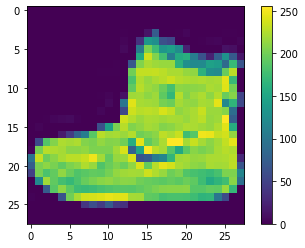

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Data standardization
sometimes call as a augmentation
!TODO!: I will study at other time "from keras.preprocessing.image import ImageDataGenerator"

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

standardized images

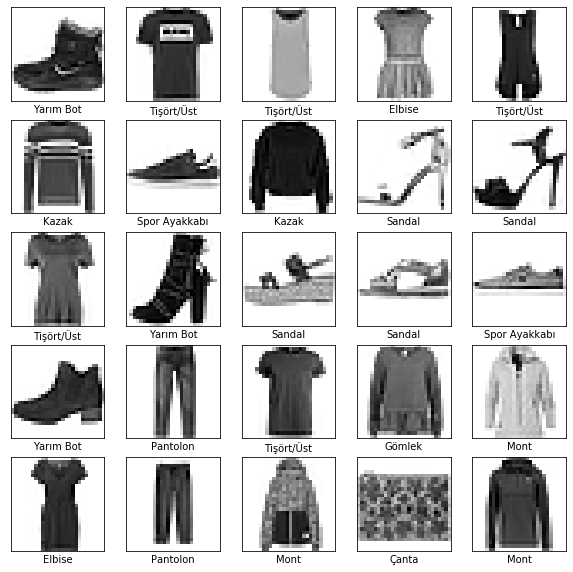

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1) # plt indexies starts from one.
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model creation
Currently my model is going to be sequential
Models create layer by layer.
There is so much layer type and you can make one.

# batch_size:
batch_size parameter is requared if data is too big. It divides batch_size into lenght of data_labels= len(data_labels)/batch_size
if batch_size is too small training process going to be slowing and painfully. I am using batchsize generally (n:5->inf)2^n
in my case I am not going to use batch_size

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# all of them can be determined as a string value
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile('sgd', loss='mse', metrics=[tf.keras.metrics.Accuracy()])
model.fit(train_images, train_labels, epochs=5)

W0819 16:33:32.392999  3856 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5012 - accuracy: 0.8243
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3760 - accuracy: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3368 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3129 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2928 - accuracy: 0.8907


# Model validation
most important result is test_acc

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)


10000/10000 [==============================] - 0s 42us/sample - loss: 0.3459 - accuracy: 0.8764
Test loss:  0.3459378152370453
Test accuracy:  0.8764


now we can make test while making predictions

In [10]:
prediction = model.predict(test_images)
print("possibility values", prediction[0]) # this is actually a possibility values, not a class name
print(np.argmax(prediction[0])) # this is a binary value

possibility values [6.1640669e-05 4.6847832e-09 1.0207820e-06 1.0928699e-08 1.8437485e-07
 7.5967439e-02 1.5355621e-05 8.5604087e-02 3.0814175e-05 8.3831948e-01]
9


let's visualize what we have
* Note: results are completely random every in training process

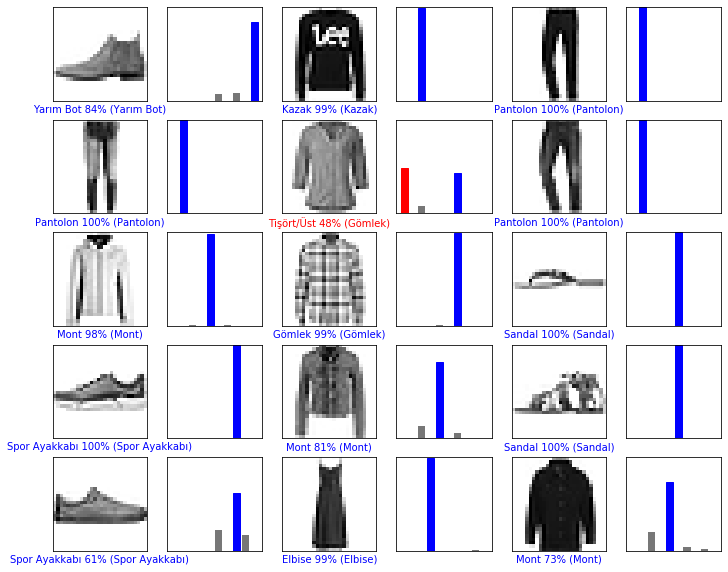

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
     
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')      
    
def plooot(i, predictions, test_labels, test_images):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction, test_labels)
plt.show()

test one more time outside of training set

just image: img.shape
(1, 28, 28)
[[6.1640611e-05 4.6847837e-09 1.0207821e-06 1.0928679e-08 1.8437470e-07
  7.5967394e-02 1.5355623e-05 8.5604049e-02 3.0814179e-05 8.3831960e-01]]


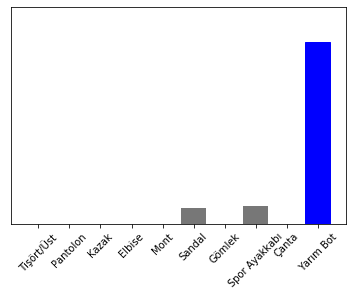

prediction result: 9


In [13]:
img = test_images[0]
print(f'just image: img.shape')

# let's import to the list
img =(np.expand_dims(img,0))
print(img.shape)

#predict
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

prediction_result = np.argmax(predictions_single[0])
print(f'prediction result: {prediction_result}')